# Clean that twitter data!

Use of the "Table of Contents" nbextension is highly recommended.

### Basic imports, settings

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import os
import json
import sys
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth',100)

### Check variables in memory

In [64]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('data', 25232158),
 ('original_text', 12237643),
 ('tokens', 7807048),
 ('all_words', 4290016),
 ('counts', 1310832),
 ('tweets', 468017),
 ('Counter', 1056),
 ('SnowballStemmer', 1056),
 ('TweetTokenizer', 1056),
 ('file_names', 528),
 ('file', 216),
 ('regex', 192),
 ('tmp', 184),
 ('token_cleaner', 136),
 ('file_path', 84),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('dir_path', 68),
 ('file_name', 64),
 ('stopwords', 56),
 ('tokenizer', 56)]

## Read data

In [3]:
dir_path = '../data/tweets_maga'
data = pd.DataFrame()

print('Loading tweets from', dir_path)
file_names = [file for file in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, file))]
for file_name in file_names:
    file_path = dir_path + '/' + file_name
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = pd.read_json(file)
        data = pd.concat([data, tweets], ignore_index=True)
        
print('Successfully loaded {} tweets from {} files.'.format(len(data), len(file_names)))

Loading tweets from ../data/tweets_maga
Successfully loaded 50000 tweets from 50 files.


In [4]:
original_text = data.text
original_text

0        @realDonaldTrump I’m confused. Is this a new “greatest” or the same as the old? All of your scan...
1                            @realDonaldTrump @Hyundai @Kia @Aptiv I'm not yet tired of winning, Sir!  #MAGA
2        @WA_Silenced_Maj @realDonaldTrump You are the true patriots!  If Antifa physically assaults you ...
3        It is amazing to watch @RudyGiuliani throw his reputation down the toilet. My guess @realDonaldT...
4                     @w_terrence @realDonaldTrump WHOOOOOHOOOOO! I’m so excited for you! #MAGA #KAG2020♥️🇺🇸
5        #Trump LIED ABOUT WIKILEAKS in #MuellerReport\n\nThe grand-jury REDACTIONS in special counsel #M...
6                               Never polled and don't know anyone that has. \n#MAGA https://t.co/n1bzaxntWX
7        #GettumGirl\n\n#Maga needs to get off their ass and put their foot down!\n\nDems/Antifa (same th...
8                                                                   @realDonaldTrump Beautiful!\n#KAG\n#MAGA
9        #RedOctobe

## Clean data

### Lower case, strip

In [5]:
# everything in lower case, strip
data['text'] = data.text.str.lower()
data['text'] = data.text.str.strip()

### Remove tags, usernames, hyperlinks

In [6]:
# remove every #tag 
data['text'] = data.text.str.replace(r'#\S*', '')

In [7]:
# remove every @username
data['text'] = data.text.str.replace(r'@\S*', '')

In [8]:
# remove links
data['text'] = data.text.str.replace(r'http(\S)*', '')

### Remove punctuation

In [9]:
# side note: f*ck those wierdly encoded characters, I'm gonna deal with them in another way... :@
data['text'] = data.text.str.replace(r'[\.,;:?!\(\)\n\t]','')

In [14]:
data.text

0         i’m confused is this a new “greatest” or the same as the old all of your scandals are hard to f...
1                                                                         i'm not yet tired of winning sir  
2          you are the true patriots  if antifa physically assaults you in any way you can legally defend...
3        it is amazing to watch  throw his reputation down the toilet my guess  has something on him or m...
4                                                                     whooooohooooo i’m so excited for you  
5         lied about wikileaks in the grand-jury redactions in special counsel  report show that presiden...
6                                                              never polled and don't know anyone that has  
7                 needs to get off their ass and put their foot downdems/antifa same thing crossed the line 
8                                                                                                  beautiful
9                  

### Tokenize

In [10]:
from nltk.tokenize import TweetTokenizer

# strip_handles because I'm not sure what it does (maybe removes usernames?),
# reduce_len because I want 'waaaaaay' to be equal to 'waaay'
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tandemelephant/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

def token_cleaner(token_list):
    
    stemmer = SnowballStemmer('english')
    
    stop_words = set(stopwords.words('english'))
    # add custom filters
    stop_words.add('amp')
    
    # return words with 2 or more letters
    regex = re.compile(r'\w\w+')
    
    tokens = [x for x in token_list if x not in stop_words]
    return list(filter(regex.search, [stemmer.stem(x) for x in tokens]))

In [47]:
data['tokens'] = data.text.apply(tokenizer.tokenize).apply(token_cleaner)

In [65]:
data.to_csv(dir_path + '/' + 'data_merged.csv')

In [40]:
all_words = [word for sublist in tokens.values for word in sublist ]

In [61]:
from collections import Counter

counts = Counter(all_words)
print(counts)

Counter({'trump': 8328, 'presid': 4767, 'get': 3286, 'peopl': 3100, 'like': 3048, 'go': 2843, 'us': 2545, 'follow': 2540, 'know': 2465, 'thank': 2284, 'impeach': 2245, 'support': 2243, 'democrat': 2213, 'america': 2180, 'time': 2117, 'one': 2102, 'make': 2082, 'american': 2072, 'patriot': 2012, 'want': 2011, 'vote': 1998, 'need': 1930, 'say': 1911, 'great': 1874, 'would': 1814, 'love': 1764, 'let': 1742, 'back': 1725, 'think': 1643, 'countri': 1614, 'lie': 1596, 'right': 1528, 'call': 1503, 'see': 1502, 'good': 1454, 'keep': 1385, 'corrupt': 1365, 'come': 1331, 'take': 1322, 'work': 1308, 'look': 1302, 'never': 1294, 'tri': 1263, 'poll': 1252, 'dem': 1245, 'help': 1243, '2020': 1238, 'win': 1201, 'news': 1193, 'year': 1181, 'pleas': 1178, 'elect': 1144, 'state': 1111, 'day': 1091, 'god': 1091, 'way': 1038, 'thing': 1002, 'even': 992, 'show': 976, 'biden': 963, 'stop': 962, 'hous': 957, 'much': 948, 'ever': 948, 'use': 942, 'new': 941, 'fight': 928, 'anoth': 913, 'rt': 891, 'via': 885, 

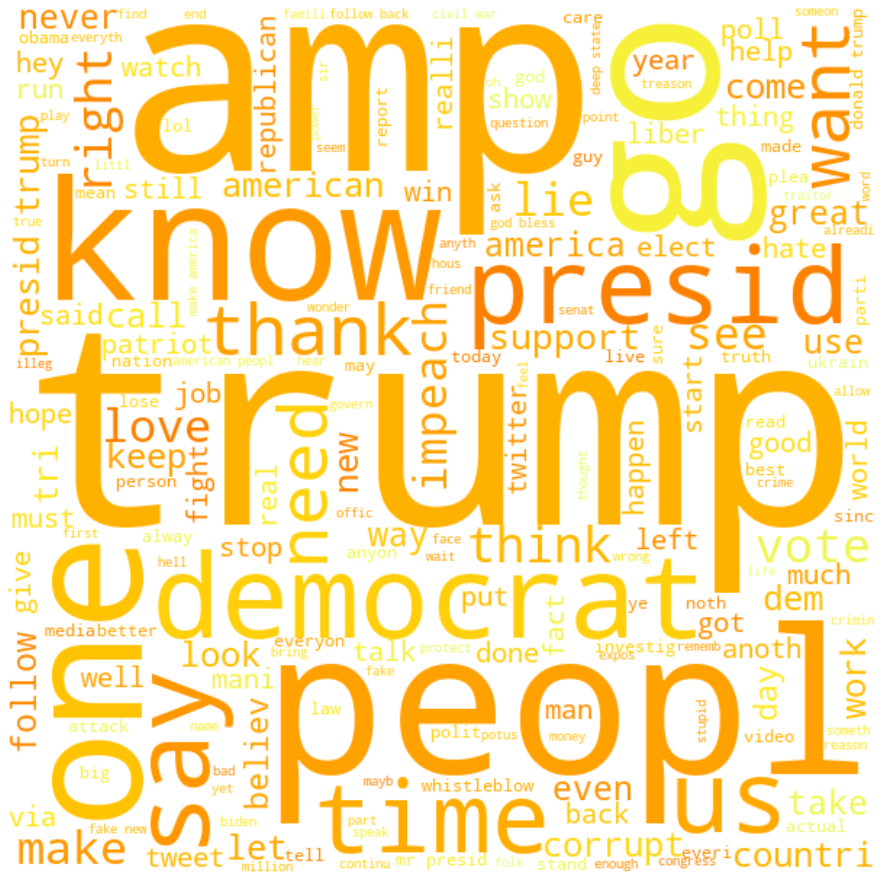

In [119]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 600, height=600, background_color='white', colormap='Wistia').generate(' '.join(all_words))

fig, ax = plt.subplots(figsize=(16,16))

ax.imshow(word_cloud, interpolation='bilinear')

plt.axis('off')
plt.savefig('../img/maga_cloud.png', facecolor='white')
plt.show()